# Pokemon Analysis

I use a pokemon dataset, scraped from <a href='https://pokemondb.net/pokedex/all'>pokemondb.net</a>. The purpose of this project is to analyse the dataset, derive interesting conclusions about the data and most importantly learn!

## Data Preparation and Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

I wanted to challenge myself further so i didn't get an existing dataset. I scraped pokemondb.net and got the pokemon from the pokedex using the BeautifulSoup library.

In [2]:
r = requests.get('https://pokemondb.net/pokedex/all')

In [3]:
soup = BeautifulSoup(r.content, 'html.parser')

In [4]:
pokemon_list_html = soup.find_all('tr')[1:]

In [5]:
header_list_html = soup.find_all('tr')[:1]

In [6]:
header_list_html

[<tr>
 <th class="sorting" data-sort="int"><div class="sortwrap">#</div></th> <th class="sorting" data-sort="string"><div class="sortwrap">Name</div></th> <th><div class="sortwrap">Type</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Total</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">HP</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Attack</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Defense</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Sp. Atk</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Sp. Def</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Speed</div></th> </tr>]

In [7]:
header_list = [th.text for th in header_list_html[0].find_all('th')]

In [8]:
header_list

['#',
 'Name',
 'Type',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed']

In [9]:
pokemon_list = [[td.text for td in row.find_all('td')] for row in pokemon_list_html]

In [10]:
pokemon_df = pd.DataFrame(pokemon_list, columns=header_list)

In [11]:
pokemon_df

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,002,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,003,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,003,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,004,Charmander,Fire,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...
1029,890,Eternatus Eternamax,Poison Dragon,1125,255,115,250,125,250,130
1030,891,Kubfu,Fighting,385,60,90,60,53,50,72
1031,892,Urshifu Single Strike Style,Fighting Dark,550,100,130,100,63,60,97
1032,892,Urshifu Rapid Strike Style,Fighting Water,550,100,130,100,63,60,97


In [12]:
pokemon_df.shape

(1034, 10)

In [13]:
pokemon_df.columns

Index(['#', 'Name', 'Type', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed'],
      dtype='object')

In [14]:
pokemon_df['Type_1'] = pokemon_df['Type'].str.split(' ')
pokemon_df['Type_2'] = pokemon_df['Type'].str.split(' ')

In [15]:
pokemon_df.Type_1 = pokemon_df.Type_1.apply(lambda x: x[0])

In [16]:
pokemon_df.Type_1

0          Grass
1          Grass
2          Grass
3          Grass
4           Fire
          ...   
1029      Poison
1030    Fighting
1031    Fighting
1032    Fighting
1033        Dark
Name: Type_1, Length: 1034, dtype: object

In [17]:
pokemon_df['Type_2'] = pokemon_df['Type_2'].apply(lambda x: x[1])

In [18]:
pokemon_df['Type_2']

0       Poison
1       Poison
2       Poison
3       Poison
4             
         ...  
1029    Dragon
1030          
1031      Dark
1032     Water
1033     Grass
Name: Type_2, Length: 1034, dtype: object

In [19]:
pokemon_df.drop(columns=['Type'], axis=1, inplace=True)

In [20]:
pokemon_df

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type_1,Type_2
0,001,Bulbasaur,318,45,49,49,65,65,45,Grass,Poison
1,002,Ivysaur,405,60,62,63,80,80,60,Grass,Poison
2,003,Venusaur,525,80,82,83,100,100,80,Grass,Poison
3,003,Venusaur Mega Venusaur,625,80,100,123,122,120,80,Grass,Poison
4,004,Charmander,309,39,52,43,60,50,65,Fire,
...,...,...,...,...,...,...,...,...,...,...,...
1029,890,Eternatus Eternamax,1125,255,115,250,125,250,130,Poison,Dragon
1030,891,Kubfu,385,60,90,60,53,50,72,Fighting,
1031,892,Urshifu Single Strike Style,550,100,130,100,63,60,97,Fighting,Dark
1032,892,Urshifu Rapid Strike Style,550,100,130,100,63,60,97,Fighting,Water


## Exploratory Analysis and Visualization



In [21]:
pokemon_types = pokemon_df['Type_1'].unique()

In [22]:
pokemon_types

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison',
       'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting',
       'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying'], dtype=object)

In [23]:
# Number of pokemon per Type

pokemon_types_count = {type: pokemon_df[(pokemon_df['Type_1']==type) | (pokemon_df['Type_2']==type)].shape[0] for type in pokemon_types}

In [24]:
pokemon_types_count

{'Grass': 118,
 'Fire': 82,
 'Water': 154,
 'Bug': 90,
 'Normal': 126,
 'Dark': 72,
 'Poison': 78,
 'Electric': 72,
 'Ground': 80,
 'Ice': 55,
 'Fairy': 63,
 'Steel': 71,
 'Fighting': 73,
 'Psychic': 116,
 'Rock': 75,
 'Ghost': 66,
 'Dragon': 72,
 'Flying': 117}

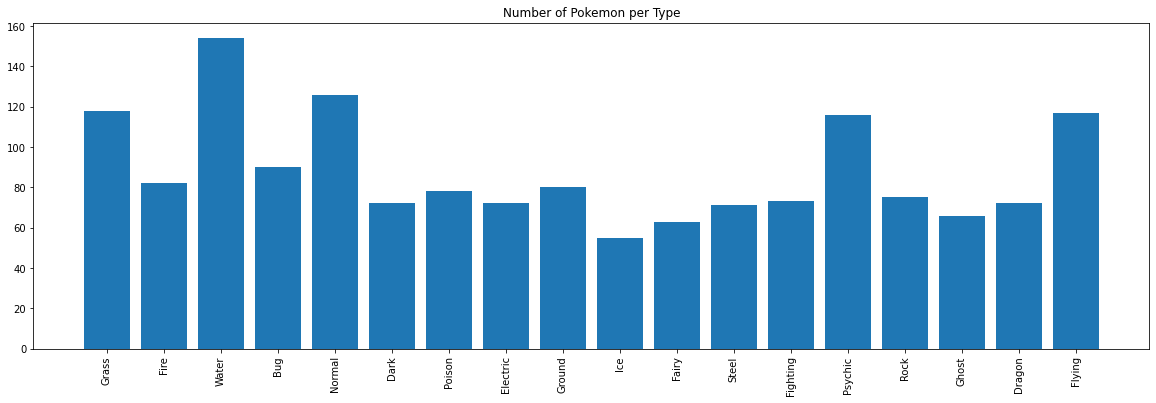

In [25]:
keys = pokemon_types_count.keys()
values = pokemon_types_count.values()

plt.figure(figsize=(20, 6))
plt.bar(keys, values)
plt.xticks(rotation=90)
plt.title('Number of Pokemon per Type');

Water is the Type that appears most of all in the pokemon list while Ice Type appears the least amount of times.

In [26]:
# Plot the Total of the 25 strongest pokemon

pokemon_df_strongest = pokemon_df.copy()
pokemon_df_strongest

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type_1,Type_2
0,001,Bulbasaur,318,45,49,49,65,65,45,Grass,Poison
1,002,Ivysaur,405,60,62,63,80,80,60,Grass,Poison
2,003,Venusaur,525,80,82,83,100,100,80,Grass,Poison
3,003,Venusaur Mega Venusaur,625,80,100,123,122,120,80,Grass,Poison
4,004,Charmander,309,39,52,43,60,50,65,Fire,
...,...,...,...,...,...,...,...,...,...,...,...
1029,890,Eternatus Eternamax,1125,255,115,250,125,250,130,Poison,Dragon
1030,891,Kubfu,385,60,90,60,53,50,72,Fighting,
1031,892,Urshifu Single Strike Style,550,100,130,100,63,60,97,Fighting,Dark
1032,892,Urshifu Rapid Strike Style,550,100,130,100,63,60,97,Fighting,Water


In [27]:
pokemon_df_strongest.sort_values(by='Total', ascending=False)

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type_1,Type_2
191,150,Mewtwo Mega Mewtwo X,780,106,190,100,154,100,130,Psychic,Fighting
460,384,Rayquaza Mega Rayquaza,780,105,180,100,180,100,115,Dragon,Flying
192,150,Mewtwo Mega Mewtwo Y,780,106,150,70,194,120,140,Psychic,
456,382,Kyogre Primal Kyogre,770,100,150,90,180,160,90,Water,
458,383,Groudon Primal Groudon,770,100,180,160,150,90,90,Ground,Fire
...,...,...,...,...,...,...,...,...,...,...,...
1005,872,Snom,185,30,25,35,45,30,20,Ice,Bug
956,824,Blipbug,180,25,20,20,25,45,45,Bug,
234,191,Sunkern,180,30,30,30,30,30,30,Grass,
873,746,Wishiwashi Solo Form,175,45,20,20,25,25,40,Water,


We see that the Total column is not of type number because 1125 is the last value in descending order. So, it is a good time to check the rest.

In [28]:
pokemon_df = pokemon_df.astype({'#': 'int32', 'Total': 'int32', 'HP': 'int32', 'Attack': 'int32', 'Defense': 'int32', 'Sp. Atk': 'int32', 'Sp. Def': 'int32', 'Speed': 'int32'})

In [29]:
pokemon_df.dtypes

#           int32
Name       object
Total       int32
HP          int32
Attack      int32
Defense     int32
Sp. Atk     int32
Sp. Def     int32
Speed       int32
Type_1     object
Type_2     object
dtype: object

In [30]:
pokemon_df_strongest = pokemon_df.copy()
pokemon_df_strongest = pokemon_df_strongest.sort_values(by='Total', ascending=False)[:25]

In [31]:
pokemon_df_strongest

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type_1,Type_2
1029,890,Eternatus Eternamax,1125,255,115,250,125,250,130,Poison,Dragon
191,150,Mewtwo Mega Mewtwo X,780,106,190,100,154,100,130,Psychic,Fighting
192,150,Mewtwo Mega Mewtwo Y,780,106,150,70,194,120,140,Psychic,
460,384,Rayquaza Mega Rayquaza,780,105,180,100,180,100,115,Dragon,Flying
456,382,Kyogre Primal Kyogre,770,100,150,90,180,160,90,Water,
458,383,Groudon Primal Groudon,770,100,180,160,150,90,90,Ground,Fire
932,800,Necrozma Ultra Necrozma,754,97,167,97,167,97,129,Psychic,Dragon
586,493,Arceus,720,120,120,120,120,120,120,Normal,
1024,888,Zacian Crowned Sword,720,92,170,115,80,115,148,Fairy,Steel
1026,889,Zamazenta Crowned Shield,720,92,130,145,80,145,128,Fighting,Steel


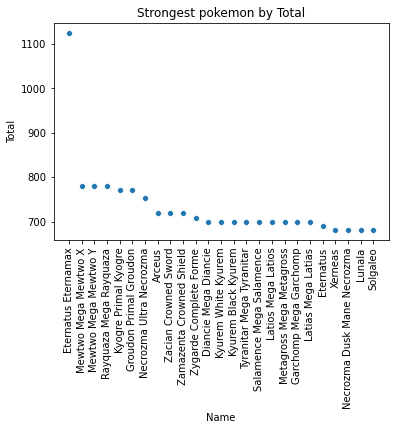

In [32]:
sns.scatterplot(x='Name', y='Total', data=pokemon_df_strongest)
plt.xticks(rotation=90)
plt.title('Strongest pokemon by Total');

The 25 strongest pokemon appear in the above scatteplot. Eternatus Eternamax is the strongest and is a lot higher than the others. If we see the pokemon lore, Eternatus Eternamax is indeed the strongest, cannot be caught legitimately and the player only encounters it once in Sword and Shield just to fight it.

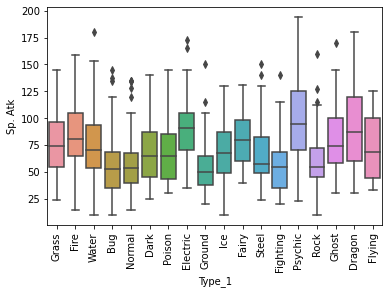

In [33]:
sns.boxplot(x='Type_1', y='Sp. Atk', data=pokemon_df)
plt.xticks(rotation=90);

We see from the above Boxplot that Psychic Pokemon have better special attack on average than the rest of the types. This is true as we know from the games that Psychic Pokemon attack using moves requiring high special attack.

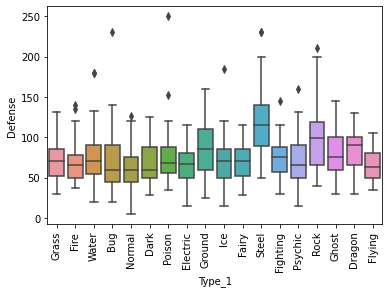

In [34]:
sns.boxplot(x='Type_1', y='Defense', data=pokemon_df)
plt.xticks(rotation=90);

From the above Boxplot we see that overall Steel, Rock and Ground pokemon have the highest Defense stats. This is logical if we think that in real life as steel, rock and ground are strong and sturdy materials.

In [35]:
correlation = pokemon_df.iloc[:, 1:].corr()

In [36]:
correlation

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Total,1.000000,0.650516,0.734472,0.632299,0.732144,0.721169,0.563644
HP,0.650516,1.000000,0.445708,0.305213,0.367666,0.397349,0.188450
Attack,0.734472,0.445708,1.000000,0.453685,0.373534,0.263879,0.382941
Defense,0.632299,0.305213,0.453685,1.000000,0.226784,0.540951,0.011702
Sp. Atk,0.732144,0.367666,0.373534,0.226784,1.000000,0.513212,0.441081
Sp. Def,0.721169,0.397349,0.263879,0.540951,0.513212,1.000000,0.234861
Speed,0.563644,0.188450,0.382941,0.011702,0.441081,0.234861,1.000000


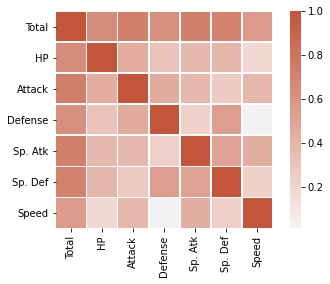

In [37]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 1})

From the above correlation matrix we can see that pokemon with high special defense tend to have higher defense and special attack as well but lower attack. This might happen because such pokemon might be defense oriented and because special stats are correlated with each other most of the time. A psychic pokemon for example will mostly have higher special stats in both attack and defense than its attack and defense stats.

## Asking and Answering Questions



#### Q1. Which pokemon is the fastest?

In [38]:
fastest = pokemon_df.sort_values(by='Speed', ascending=False)[:1]['Name'].values[0]

In [39]:
print(f'The fastest pokemon is {fastest}.')

The fastest pokemon is Deoxys Speed Forme.


#### Q2. Which pokemon has the highest sum of Defense and Special Defense?

In [40]:
pokemon_df['Overall Def'] = pokemon_df['Defense'] + pokemon_df['Sp. Def']

In [41]:
pokemon_df.sort_values(by='Overall Def', ascending=False)

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type_1,Type_2,Overall Def
1029,890,Eternatus Eternamax,1125,255,115,250,125,250,130,Poison,Dragon,500
258,213,Shuckle,505,20,10,230,10,230,5,Bug,Rock,460
252,208,Steelix Mega Steelix,610,75,125,230,55,95,30,Steel,Ground,325
464,386,Deoxys Defense Forme,600,50,70,160,70,160,90,Psychic,,320
937,805,Stakataka,570,61,131,211,53,101,13,Rock,Steel,312
...,...,...,...,...,...,...,...,...,...,...,...,...
52,39,Jigglypuff,270,115,45,20,45,25,20,Normal,Fairy,45
873,746,Wishiwashi Solo Form,175,45,20,20,25,25,40,Water,,45
378,318,Carvanha,305,45,90,20,65,20,65,Water,Dark,40
463,386,Deoxys Attack Forme,600,50,180,20,180,20,150,Psychic,,40


Excluding the overpowered Eternatus Eternamax, Shuckle is the king of Defense in the game!

#### Q3. Which pokemon has the highest disparity between Overall Attack and Overall Defense?

In [42]:
pokemon_df['Overall Atk'] = pokemon_df['Attack'] + pokemon_df['Sp. Atk']

In [43]:
pokemon_df['Atk_Def_Disparity'] = pokemon_df['Overall Atk'] - pokemon_df['Overall Def']

In [44]:
pokemon_df['Atk_Def_Disparity'] = pokemon_df['Atk_Def_Disparity'].apply(lambda x: x if x>0 else -x)

In [45]:
pokemon_df.sort_values(by='Atk_Def_Disparity', ascending=False)

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type_1,Type_2,Overall Def,Overall Atk,Atk_Def_Disparity
258,213,Shuckle,505,20,10,230,10,230,5,Bug,Rock,460,20,440
463,386,Deoxys Attack Forme,600,50,180,20,180,20,150,Psychic,,40,360,320
1029,890,Eternatus Eternamax,1125,255,115,250,125,250,130,Poison,Dragon,500,240,260
490,411,Bastiodon,495,60,52,168,47,138,30,Rock,Steel,306,99,207
919,790,Cosmoem,400,43,29,131,29,131,37,Psychic,,262,58,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,301,Delcatty,400,70,65,65,55,55,90,Normal,,120,120,0
357,302,Sableye,380,50,75,75,65,65,50,Dark,Ghost,140,140,0
359,303,Mawile,380,50,85,85,55,55,50,Steel,Fairy,140,140,0
389,327,Spinda,360,60,60,60,60,60,60,Normal,,120,120,0


As it was expected Shuckle has the highest disparity between its Attack and Defense stats as it has the highest defense in the game barring Eternatus Eternamax but also abysmal attack stats.

#### Q4. Which pokemon has the highest HP in the pokedex?

In [46]:
pokemon_df.sort_values(by='HP', ascending=False)

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type_1,Type_2,Overall Def,Overall Atk,Atk_Def_Disparity
290,242,Blissey,540,255,10,10,75,135,55,Normal,,145,85,60
1029,890,Eternatus Eternamax,1125,255,115,250,125,250,130,Poison,Dragon,500,240,260
147,113,Chansey,450,250,5,5,35,105,50,Normal,,110,40,70
928,799,Guzzlord,570,223,101,53,97,53,43,Dark,Dragon,106,198,92
837,718,Zygarde Complete Forme,708,216,100,121,91,95,85,Dragon,Ground,216,191,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,355,Duskull,295,20,40,90,30,90,25,Ghost,,180,70,110
412,349,Feebas,200,20,15,20,10,55,80,Water,,75,25,50
64,50,Diglett Alolan Diglett,265,10,55,30,35,45,90,Ground,Steel,75,90,15
63,50,Diglett,265,10,55,25,35,45,95,Ground,,70,90,20


Excluding Eternatus Eternamax from the results once again, we observe that Blissey and Chancey have the highest HP stats. As we know from the game Blissey is Chansey's evolution and both pokemon are well known for their bulkiness (their other stats are low otherwise they would be too overpowered).

#### Q5. Which 10 pokemon have the worst overall stats?

In [47]:
pokemon_df.sort_values(by='Total')[:10]

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type_1,Type_2,Overall Def,Overall Atk,Atk_Def_Disparity
873,746,Wishiwashi Solo Form,175,45,20,20,25,25,40,Water,,45,45,0
234,191,Sunkern,180,30,30,30,30,30,30,Grass,,60,60,0
956,824,Blipbug,180,25,20,20,25,45,45,Bug,,65,45,20
1005,872,Snom,185,30,25,35,45,30,20,Ice,Bug,65,70,5
353,298,Azurill,190,50,20,40,20,40,20,Normal,Fairy,80,40,40
480,401,Kricketot,194,37,25,41,25,41,25,Bug,,82,50,32
16,13,Weedle,195,40,35,30,20,20,50,Bug,Poison,50,55,5
319,265,Wurmple,195,45,45,35,20,30,20,Bug,,65,65,0
13,10,Caterpie,195,45,30,35,20,20,45,Bug,,55,50,5
334,280,Ralts,198,28,25,25,45,35,40,Psychic,Fairy,60,70,10


The list of the worst pokemon by their total stats is dominated by bug pokemon such as Caterpie, Weedle. These pokemon are really weak and someone can encounter them super early in the pokemon games (Viridian Forest in Blue, even before the player gets to the first badge). In this list we find a baby pokemon as well, Azurill. Beware. Don't try to fight another trainer with any of these. You'll definitely lose (assuming same level pokemon, of course).

## Inferences and Conclusion



By analysing the Pokemon dataset we arrived to some conclusions that someone that had played the pokemon series in the past would easily infer or understand.

Some of these inferences include that Psychic pokemon have the highest Special Stats, that as the series/games evolve the Pokemon Company introduces stronger and stronger pokemon (Mega Evolutions and various new pokemon forms dominate the strongest pokemon list) and that Shuckle is a beast of a Pokemon! :P

## References and Future Work



The source of the data is <a href='https://pokemondb.net/pokedex/all'>pokemondb.net</a>.

Regarding future work I could add a dataset of battles between pokemon and analyze the winrates of different species or even predict the outcome of some battles.